In [35]:
%matplotlib inline

import os
import requests
import pandas
from matplotlib import pyplot

# Try import inline 3D structure viewer if installed
viewer_enabled = True
try:
    import py3Dmol
except ImportError:
    viewer_enabled = False

SERVICE_BASE_URL = 'http://mdstudio-smartcyp.dev.openrisknet.org/'

# Performing PLANTS docking predictions

MDStudio SMARTCyp supports nearly all configuration options for PLANTS in two convenient endpoints. A flexible PLANTS docking workflow requires the combined use of two endpoints:

1. The 'plants_docking' endpoint performs the actual docking with support for most of the configuration options of  
   PLANTS. The endpoint returns the docking results as JSON file. This is the content of the PLANTS features.csv or 
   alternatively the ranking.csv file. The results have the 'PATH' column added that provides a unique pointer to the
   docking poses stored on the server for a set time, by default a maximum of 1 hour before the results are deleted.
   In addition, a structure based clustering of the docking poses is performed. The obtained cluster numbers are 
   listed in the 'CLUSTER' column.
2. Based on the results from step 1 one or multiple (selection) of docking poses can be retrieved as multi-structure    MOL2 file using the 'plants_docking_structures' endpoint using the unique pointers to the poses in the PATH 
   column. The same procedure can be used to redo the clustering for all of the solutions or a selection using the
   'plants_docking_statistics' endpoint

### Requesting information on the installed PLANTS version

Returns information on the installed PLANTS version including default configuration

In [36]:
response = requests.get('{0}/plants_docking_info'.format(SERVICE_BASE_URL))
response.json()

{'citation': 'Korb O., Stützle T., Exner T.E., An ant colony optimization approach to flexibleprotein–ligand docking. Swarm Intelligence (2007); 1(2):115-134.',
 'default_settings': {'aco_ants': 20,
  'bindingsite_radius': 12,
  'chemplp_charged_hb_weight': 2.0,
  'chemplp_charged_metal_weight': 2.0,
  'chemplp_clash_include_14': 1,
  'chemplp_clash_include_HH': 0,
  'chemplp_hbond_cho_weight': -3.0,
  'chemplp_hbond_weight': -3.0,
  'chemplp_intercept_weight': -20.0,
  'chemplp_lipo_weight': 0.0,
  'chemplp_metal_weight': -6.0,
  'chemplp_plp_burpolar_e': -0.1,
  'chemplp_plp_hbond_e': -1.0,
  'chemplp_plp_metal_e': -1.0,
  'chemplp_plp_repulsive_weight': 1.0,
  'chemplp_plp_steric_e': -0.4,
  'chemplp_plp_weight': 1.0,
  'chemplp_tors_weight': 2.0,
  'chemplp_weak_cho': 1,
  'cluster_rmsd': 1.0,
  'cluster_structures': 50,
  'criterion': 'maxclust',
  'enable_sulphur_acceptors': 0,
  'flip_amide_bonds': 1,
  'flip_planar_n': 1,
  'flip_ring_corners': 0,
  'force_flipped_bonds_planari

### Running a simple PLANTS docking

Starting of simple with step 1, uploading required ligand and protein structure files in MOL2 format and a target binding site center coordinate. The result JSON object is loaded into a Pandas DataFrame ready for analysis and friendly visualization.

In [37]:
files = {'ligand_file': open(os.path.join('files/ligand.mol2'), 'rb'), 
         'protein_file': open(os.path.join('files/protein.mol2'), 'rb')}
data = {'bindingsite_center': [7.79934, 9.49666, 3.39229]}
response = requests.post('{0}/plants_docking'.format(SERVICE_BASE_URL), files=files, data=data)

response_json = response.json()
response_df = pandas.DataFrame.from_dict(response_json, orient='index')

pandas.options.display.max_columns = None
display(response_df)

,ACC,ATOMS_OUTSIDE_BINDINGSITE,CHEMPLP_CLASH2,CHEMparthbond,CHEMparthbondCHO,CHEMpartmetal,CLUSTER,DON,LIG_NUM_CLASH,LIG_NUM_CONTACT,LIG_NUM_NO_CONTACT,MEAN,PATH,PLPpartburpolar,PLPparthbond,PLPpartmetal,PLPpartrepulsive,PLPpartsteric,PLPtotal,SCORE_NORM_CONTACT,SCORE_NORM_CRT_HEVATOMS,SCORE_NORM_CRT_WEIGHT,SCORE_NORM_HEVATOMS,SCORE_NORM_WEIGHT,SCORE_RB_PEN,SCORE_RB_PEN_NORM_CRT_HEVATOMS,TOTAL_SCORE,TRIPOS_TORS,UNUSED_ACC,UNUSED_DON
_entry_00001_conf_01,2,0.32959,0,0,-4.88322,0,7,-2.76868,0,1,12,False,docking-lyt7nriq/_entry_00001_conf_01.mol2,0.3591,-41.3493,-36.044,0,-1.72321,-4.81503,-26.9679,-5.18542,-0.356243,-63.4105,-28.669,-67.4105,-11.7418,_entry_00001_conf_01,0,1,2
_entry_00001_conf_02,2,0.144251,1,0,-3,0,7,-3,0,0,13,True,docking-lyt7nriq/_entry_00001_conf_02.mol2,0.27581,-38.4721,-34.0059,0,-1,-4.53665,-25.3103,-4.88562,-0.335647,-59.513,-27.0115,-63.513,-11.0629,_entry_00001_conf_02,0,1,2
_entry_00001_conf_03,2,0.655237,1,0,-3,0,0,-3,0,1,12,0,docking-lyt7nriq/_entry_00001_conf_03.mol2,0.265751,-40.3088,-35.8306,0,-0.53724,-4.52794,-25.2585,-4.87625,-0.335003,-59.3912,-26.9597,-63.3912,-11.0417,_entry_00001_conf_03,0,1,2
_entry_00001_conf_04,2,0.104233,1,0,-3,0,7,-3,0,0,13,False,docking-lyt7nriq/_entry_00001_conf_04.mol2,0.217606,-38.2114,-33.5436,0,-1,-4.50174,-25.1025,-4.84802,-0.333064,-59.0243,-26.8036,-63.0243,-10.9778,_entry_00001_conf_04,0,1,2
_entry_00001_conf_05,2,0.219093,1,0,-2.54032,0,2,-3,-0.0290772,1,12,False,docking-lyt7nriq/_entry_00001_conf_05.mol2,0.335657,-38.1655,-33.569,0,-1,-4.45235,-24.8084,-4.79484,-0.32941,-58.3329,-26.5096,-62.3329,-10.8574,_entry_00001_conf_05,0,1,2
_entry_00001_conf_06,2,0.0038879,1,0,-3,0,6,-3,0,1,12,False,docking-lyt7nriq/_entry_00001_conf_06.mol2,0.16619,-36.4686,-35.7848,0,-1,-4.44428,-24.7604,-4.78614,-0.328813,-58.2199,-26.4615,-62.2199,-10.8377,_entry_00001_conf_06,0,1,2
_entry_00001_conf_07,2,0.164253,1,0,-2.76506,0,7,-2.80713,0,2,11,False,docking-lyt7nriq/_entry_00001_conf_07.mol2,0.281462,-37.4485,-34.9346,0,-1,-4.42111,-24.6224,-4.76119,-0.327098,-57.8955,-26.3236,-61.8955,-10.7812,_entry_00001_conf_07,0,1,2
_entry_00001_conf_08,2,0.450656,1,0,-3,0,6,-3,0,2,11,False,docking-lyt7nriq/_entry_00001_conf_08.mol2,0.313112,-36.0385,-37.5998,0,-1,-4.31302,-23.9788,-4.64479,-0.319101,-56.3823,-25.68,-60.3823,-10.5176,_entry_00001_conf_08,0,1,2
_entry_00001_conf_09,2,0.00427264,2,0,0,0,6,-3,0,0,13,True,docking-lyt7nriq/_entry_00001_conf_09.mol2,0.15278,-38.1151,-36.5425,0,0,-4.30756,-23.9463,-4.63891,-0.318698,-56.3059,-25.6475,-60.3059,-10.5043,_entry_00001_conf_09,0,1,2
_entry_00001_conf_10,2,0.135207,0,0,-6,0,1,0,-0.0429757,0,13,False,docking-lyt7nriq/_entry_00001_conf_10.mol2,0.463414,-35.2958,-29.7527,0,-1.94973,-4.61818,-23.8317,-4.61818,-0.317273,-56.0363,-25.5329,-60.0363,-10.4573,_entry_00001_conf_10,0,2,2


### Retrieving docking poses for cluster 1

Selects all poses belonging to cluster 1 from the previous obtained DataFrame and upload them to the 'plants_docking_structures' endpoint. The endpoint returns a multi-structure (combined) MOL2 file containing all the ligand poses.

If the inline 3D viewer is installed, the example below splits the multi-structure file into individual ligand poses and displays them together with the protein strurcture.

In [38]:
poses = response_df[response_df['CLUSTER'] == 1]['PATH']
response = requests.post('{0}/plants_docking_structures'.format(SERVICE_BASE_URL), data={'paths': list(poses)})

response_mol = response.text

# Display ligand cluster and protein structure
if viewer_enabled:
    mols = [open(os.path.join('files/protein.mol2')).read()]
    for mol in response_mol.split('@<TRIPOS>MOLECULE\n'):
        if len(mol):
            mols.append('@<TRIPOS>MOLECULE\n{0}'.format(mol))

    view = py3Dmol.view()
    for mol in mols:
        view.addModel(mol,'mol2')
    view.setStyle({'stick':{}})
    display(view)

else:
    response_mol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Redo the clustering

Redo the clustering using the 'distance' criterion with a cutoff of 3 A.

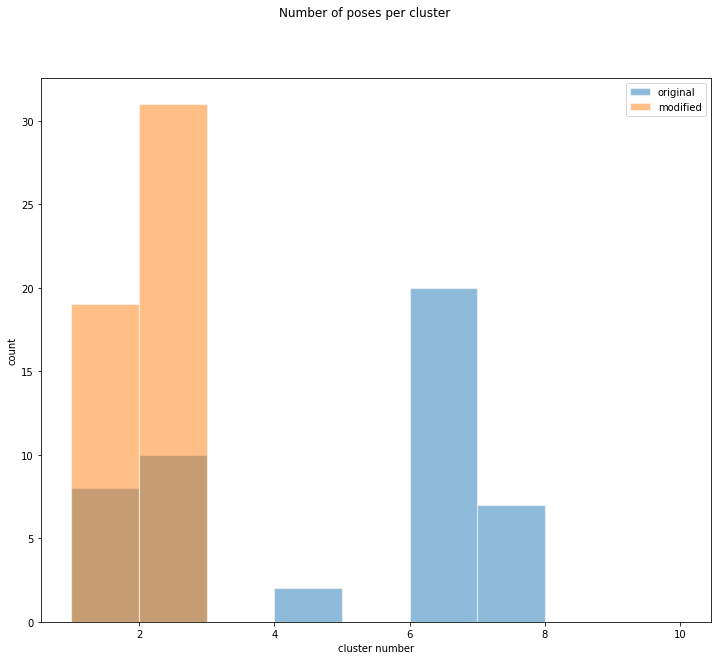

In [46]:
data = {'paths': list(response_df['PATH']), 'threshold': 3, 'criterion': 'distance'}
response = requests.post('{0}/plants_docking_statistics'.format(SERVICE_BASE_URL), data=data)

modified_json = response.json()
modified_df = pandas.DataFrame.from_dict(modified_json, orient='index')

bins = range(1,11)

pyplot.figure(figsize=(12, 10))
pyplot.hist(response_df['CLUSTER'], bins=bins, alpha=0.5, label='original', edgecolor='white', linewidth=1.2)
pyplot.hist(modified_df['CLUSTER'], bins=bins, alpha=0.5, label='modified', edgecolor='white', linewidth=1.2)
pyplot.legend(loc='upper right')
pyplot.suptitle('Number of poses per cluster')
pyplot.xlabel('cluster number')
pyplot.ylabel('count')
pyplot.show()